## Title : Heart Diseae Prediction

## Author: [Barjinder Singh]

# Meta-Data (About Dataset)
Context

# **Heart Disease Dataset Overview**

This is a **multivariate dataset**, involving a variety of mathematical and statistical variables. The dataset is widely used for **multivariate numerical data analysis**. It is composed of **14 key attributes** that include patient demographics, medical test results, and target predictions related to heart disease.

The dataset originally includes **76 attributes**, but published studies primarily use a subset of 14. The **Cleveland database** is the primary dataset referenced by machine learning researchers. 

## **Primary Objectives**
1. **Predict if a patient has heart disease** based on the provided attributes.
2. Conduct exploratory analysis to uncover insights and better understand the contributing factors for heart disease.

---

## **Dataset Attributes**

| **Attribute Name**        | **Description**                                                                                                    |
|---------------------------|--------------------------------------------------------------------------------------------------------------------|
| 🆔 **`id`**               | Unique identifier for each patient.                                                                               |
| 🧓 **`age`**              | Age of the patient (in years).                                                                                    |
| 🌍 **`origin`**           | Place of study.                                                                                                   |
| 🚻 **`sex`**              | Gender of the patient (`Male`/`Female`).                                                                          |
| ❤️ **`cp`**               | Chest pain type: <br> - `typical angina` <br> - `atypical angina` <br> - `non-anginal` <br> - `asymptomatic`.     |
| 📋 **`trestbps`**         | Resting blood pressure (in mm Hg on admission to the hospital).                                                   |
| 🧪 **`chol`**             | Serum cholesterol (in mg/dl).                                                                                     |
| 🍬 **`fbs`**              | Fasting blood sugar > 120 mg/dl (`True`/`False`).                                                                 |
| 📈 **`restecg`**          | Resting electrocardiographic results: <br> - `normal` <br> - `stt abnormality` <br> - `lv hypertrophy`.           |
| 🏃 **`thalach`**          | Maximum heart rate achieved.                                                                                      |
| ⚡ **`exang`**            | Exercise-induced angina (`True`/`False`).                                                                         |
| 📉 **`oldpeak`**          | ST depression induced by exercise relative to rest.                                                               |
| 🏔️ **`slope`**           | Slope of the peak exercise ST segment.                                                                            |
| 🔬 **`ca`**               | Number of major vessels (0–3) colored by fluoroscopy.                                                             |
| 🩺 **`thal`**             | Type of Thalassemia: <br> - `normal` <br> - `fixed defect` <br> - `reversible defect`.                            |
| 🎯 **`num`**              | The predicted attribute (whether the patient has heart disease).                                                  |

---

## **Insights and Applications**

- **Exploratory analysis** can help identify the most influential factors contributing to heart disease.
- By analyzing the dataset, researchers aim to **diagnose heart disease** more effectively and provide actionable insights for treatment and prevention.
# **Acknowledgements**

## **Creators:**
- **Hungarian Institute of Cardiology, Budapest:**  
  Andras Janosi, M.D.
- **University Hospital, Zurich, Switzerland:**  
  William Steinbrunn, M.D.
- **University Hospital, Basel, Switzerland:**  
  Matthias Pfisterer, M.D.
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:**  
  Robert Detrano, M.D., Ph.D.

---

## **Relevant Papers:**
1. **Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989).**  
   *International application of a new probability algorithm for the diagnosis of coronary artery disease.*  
   *American Journal of Cardiology, 64, 304–310.*
   
2. **David W. Aha & Dennis Kibler.**  
   *Instance-based prediction of heart-disease presence with the Cleveland database.*

3. **Gennari, J.H., Langley, P., & Fisher, D. (1989).**  
   *Models of incremental concept formation.*  
   *Artificial Intelligence, 40, 11–61.*

---

## **Citation Request:**
The authors of the database request that any publications resulting from the use of this data include the names of the principal investigators responsible for the data collection at each institution:

- **Hungarian Institute of Cardiology, Budapest:**  
  Andras Janosi, M.D.
- **University Hospital, Zurich, Switzerland:**  
  William Steinbrunn, M.D.
- **University Hospital, Basel, Switzerland:**  
  Matthias Pfisterer, M.D.
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:**  
  Robert Detrano, M.D., Ph.D.


In [4]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install xgboost


In [7]:
#load the dataset
df =pd.read_csv('heart_disease_uci.csv')

# Display the first few rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploratory Data Analysis (EDA)

In [8]:
# explore each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
# data shape
print(df.shape)

(920, 16)


In [11]:
# id column min and max
df['id'].min(),df['id'].max()

(np.int64(1), np.int64(920))

In [12]:
#age column min and max

df['age'].min(),df['age'].max()

(np.int64(28), np.int64(77))

# Minimum age of heart disease is 28

In [13]:
# lets summarize age column

df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

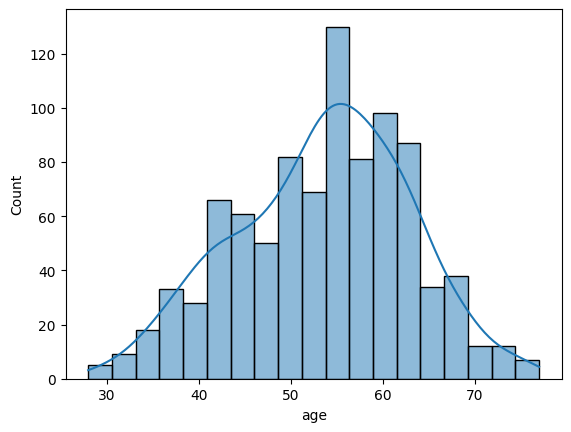

In [15]:
# draw histplot of age with kde


sns.histplot(df['age'],kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


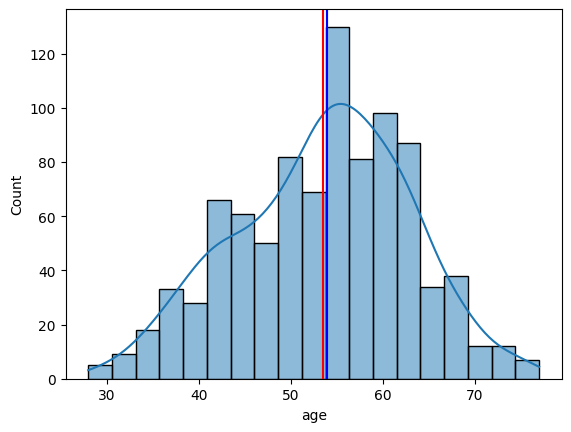

In [17]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])


# Let's explore the gender based distribution of the dataset for age column.

In [18]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [19]:
# find value count of sex column

df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [20]:
# group by

df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [21]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [22]:
# Lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [23]:
# find unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

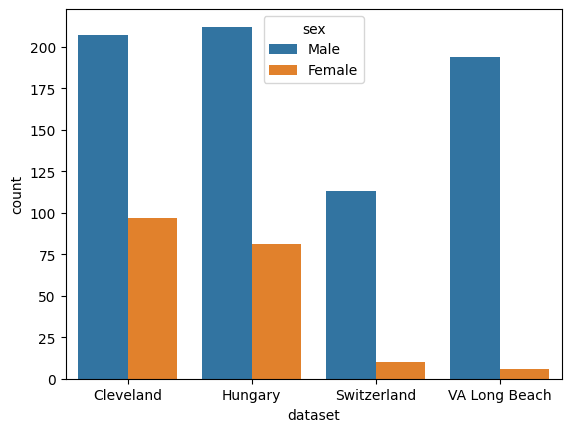

In [29]:
# plot the countplot of dataset column
sns.countplot(data=df, x='dataset', hue = 'sex')

In [25]:
# better plots with plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()


In [26]:
# print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [27]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")

Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


# Let's explore cp (Chest Pain) column:

In [30]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

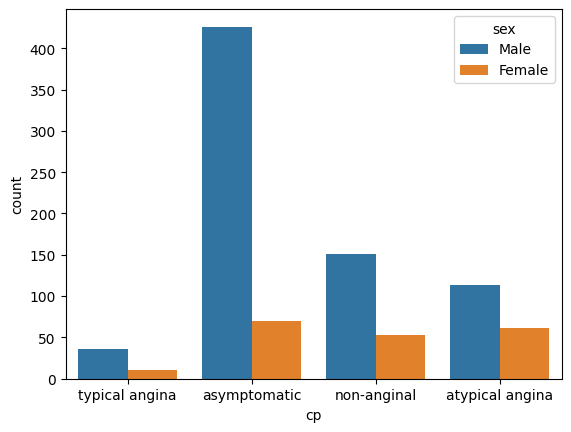

In [31]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue='sex')

In [33]:
fig=px.histogram(data_frame=df,x='age',color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

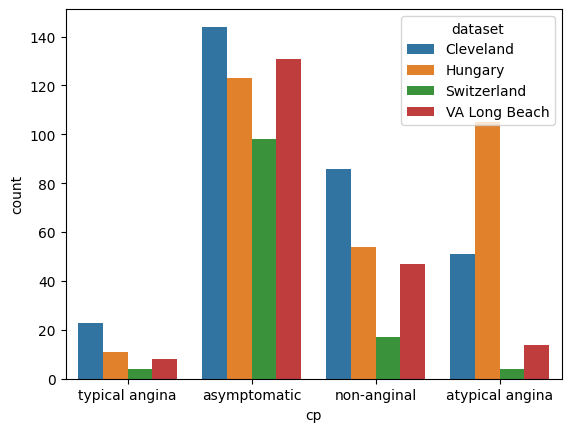

In [34]:
# count plot of cp column by dataset column
sns.countplot(df, x='cp', hue='dataset')

Let'e explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.

In [35]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

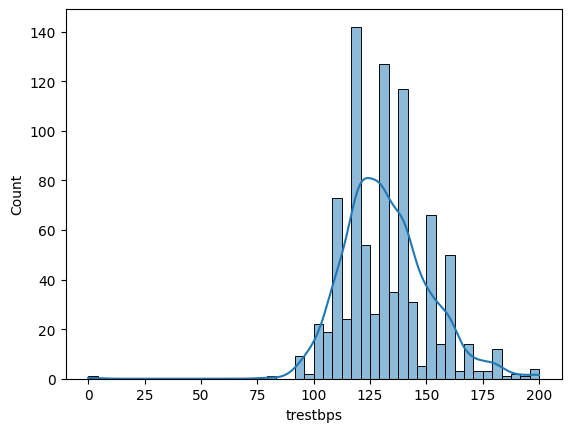

In [36]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)